In [1]:
%cd ../

C:\Users\Talha\Documents\WinPython3\projects\cnnyt


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/all-sentipol.csv')
print('Header:',', '.join(df.columns.values))
print('Number of rows and columns:',df.shape)

Header: cat, dt, fav, href, newstxt, spnews, rt, src, title, tweep, twtext, url, sptw, sptitle
Number of rows and columns: (4387, 14)


In [81]:
def getCat(x):
    pieces = x.split('/')
    if 'cnn' in x:
        return pieces[-3]
    else:
        return pieces[-2]
cats = df.href.apply(getCat)
cats = cats[~cats.str.contains('-|\d')]
cats.shape

(3749,)

In [82]:
cats.unique()

array(['asia', 'world', 'review', 'europe', 'middleeast', 'baseball',
       'americas', 'golf', 'politics', 'health', 'nyregion', 'fashion',
       'nytnow', 'dining', 'us', 'business', 'theater', 'sports',
       'international', 'opinion', 'personaltech', 'africa', 'economy',
       'upshot', 'basketball', 'science', 'travel', 'style', 'education',
       'garden', 'books', 'magazine', 'ncaabasketball', 'media',
       'awardsseason', 'hockey', 'cricket', 'dealbook', 'music', 'design',
       'television', 'sunday', 'realestate', 'automobiles', 'movies',
       'football', 'autoracing', 'cycling', 'weddings', 'technology',
       'arts', 'soccer', 'earth', 'dance', 'ncaafootball', 'space',
       'tennis', 'entertainment', 'living', 'security', 'college', 'news',
       'luxury', 'investing', 'innovationnation', 'justice', 'mobile',
       'taxes', 'companies', 'china', 'gallery', 'smallbusiness', 'tech',
       'jobs', 'sport', 'intl_world', 'pf', 'tv', 'skiing', 'autos',
       's

In [92]:
cats.name = 'category'

In [97]:
df = df.join(cats,how='inner')

In [98]:
grouped = df.groupby('category')

In [109]:
a = grouped.apply(lambda x: x.spnews.mean()).reset_index()
a = a.rename(columns={0:'sp'})
a

,category,sp
0,africa,0.045061
1,americas,0.019915
2,arts,0.125218
3,asia,0.054342
4,automobiles,0.074541
5,autoracing,0.107559
6,autos,0.115364
7,awardsseason,0.139784
8,baseball,0.106192
9,basketball,0.079406


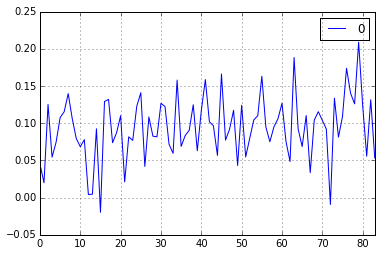

In [108]:
a.plot()